<a href="https://colab.research.google.com/github/gauravv-sardanaa/Airline_Passenger_Referral_Prediction-Python/blob/main/Airline_Passenger_Referral_Prediction_Machine_Learning_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Project Name**    -**Airline Passenger Referral Prediction**



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Submitted By**    - Gaurav Sardana
##### **Email-I'd**       - gauravsardana00@gmail.com


## **Project Summary**

The Airline Passenger Referral Prediction project aimed to analyze and predict passenger referral behavior, with the overarching goal of understanding referral trends, identifying key features influencing referrals.

# **GitHub Link -**

https://github.com/GauravSardana00/Airline-Passenger-Referral-Prediction.git

# **Problem Statement**


**BUSINESS PROBLEM OVERVIEW**

For Airline Passenger Referral Prediction, the focus is on identifying passengers likely to recommend the airline to others. In a competitive industry, customer retention and positive word-of-mouth are crucial. The project aims to analyze passenger data to uncover patterns and factors influencing referral behavior. By predicting potential referrers, airlines can strategically engage and incentivize passengers, fostering a community of satisfied customers contributing to the airline's success through referrals.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

**Dataset**:https://docs.google.com/spreadsheets/d/1A_EgDw8MjPIQS9LneZ5E_H6vkz3tlF41/edit?usp=drive_link&ouid=101829637285044081305&rtpof=true&sd=true

## **Import Libraries**

In [ ]:
# Importing Libraries that are used in this project
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
import nltk
import spacy
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import warnings
warnings.filterwarnings("ignore")

## **Data Understanding,Cleaning,Wrangling and Dimensionality Reduction**

### **Dataset Loading**

In [ ]:
# Connected my google drive to colab notebook and loaded the Dataset
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


# Specify the path to your Excel file in Google Drive
file_path = '/content/drive/MyDrive/ML Capstone Project Dataset./data_airline_reviews.xlsx'

# Read the Excel file into a Pandas DataFrame
df = pd.read_excel(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Dataset First View**

In [ ]:
# Dataset First Look
df.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### **Dataset Rows & Columns count**

In [ ]:
# Dataset Rows & Columns count
df.shape

(131895, 17)

### **Dataset Information**

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131895 entries, 0 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          65947 non-null  object 
 1   overall          64017 non-null  float64
 2   author           65947 non-null  object 
 3   review_date      65947 non-null  object 
 4   customer_review  65947 non-null  object 
 5   aircraft         19718 non-null  object 
 6   traveller_type   39755 non-null  object 
 7   cabin            63303 non-null  object 
 8   route            39726 non-null  object 
 9   date_flown       39633 non-null  object 
 10  seat_comfort     60681 non-null  float64
 11  cabin_service    60715 non-null  float64
 12  food_bev         52608 non-null  float64
 13  entertainment    44193 non-null  float64
 14  ground_service   39358 non-null  float64
 15  value_for_money  63975 non-null  float64
 16  recommended      64440 non-null  object 
dtypes: float64

#### **Duplicate Rows**

In [ ]:
# Dataset Duplicate Value Count
# Assuming 'df' is your DataFrame
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]

# Display the duplicate rows (if any)
print("Duplicate Rows:")
print(duplicate_rows)

# Display the count of duplicate rows
print("\nNumber of Duplicate Rows:", len(duplicate_rows))


Duplicate Rows:
       airline  overall author review_date customer_review aircraft  \
2          NaN      NaN    NaN         NaN             NaN      NaN   
4          NaN      NaN    NaN         NaN             NaN      NaN   
6          NaN      NaN    NaN         NaN             NaN      NaN   
8          NaN      NaN    NaN         NaN             NaN      NaN   
10         NaN      NaN    NaN         NaN             NaN      NaN   
...        ...      ...    ...         ...             ...      ...   
131885     NaN      NaN    NaN         NaN             NaN      NaN   
131887     NaN      NaN    NaN         NaN             NaN      NaN   
131889     NaN      NaN    NaN         NaN             NaN      NaN   
131891     NaN      NaN    NaN         NaN             NaN      NaN   
131893     NaN      NaN    NaN         NaN             NaN      NaN   

       traveller_type cabin route date_flown  seat_comfort  cabin_service  \
2                 NaN   NaN   NaN        NaN          

It is clear from the above output that in this dataset there are total of 70711 rows which are completely null.Not even a single column is filled.

#### Handling Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
#dropping duplicated values first as it is clearly visible that most of duplicated rows are having rows in which not even a single column is filled.
# Remove duplicate rows and keep the first occurrence
df_no_duplicates = df.drop_duplicates()
# Reset the index
df_reset = df_no_duplicates.reset_index(drop=True)

# The drop=True parameter prevents the old index from being added as a new column in the DataFrame

# Display the DataFrame with the reset index and dropping duplicates
print("DataFrame with Reset Index and dropping duplicates.:")
print(df_reset.head())

DataFrame with Reset Index and dropping duplicates.:
            airline  overall               author   review_date  \
0               NaN      NaN                  NaN           NaN   
1  Turkish Airlines      7.0  Christopher Hackley  8th May 2019   
2  Turkish Airlines      2.0        Adriana Pisoi  7th May 2019   
3  Turkish Airlines      3.0            M Galerko  7th May 2019   
4  Turkish Airlines     10.0          Zeshan Shah  6th May 2019   

                                     customer_review aircraft  traveller_type  \
0                                                NaN      NaN             NaN   
1  âœ… Trip Verified | London to Izmir via Istanb...      NaN        Business   
2  âœ… Trip Verified | Istanbul to Bucharest. We ...      NaN  Family Leisure   
3  âœ… Trip Verified | Rome to Prishtina via Ista...      NaN        Business   
4  âœ… Trip Verified | Flew on Turkish Airlines I...     A330    Solo Leisure   

           cabin                           route         

In [ ]:
# Getting the information of data.
df_reset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61184 entries, 0 to 61183
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          61183 non-null  object 
 1   overall          59401 non-null  float64
 2   author           61183 non-null  object 
 3   review_date      61183 non-null  object 
 4   customer_review  61183 non-null  object 
 5   aircraft         18488 non-null  object 
 6   traveller_type   37540 non-null  object 
 7   cabin            58705 non-null  object 
 8   route            37513 non-null  object 
 9   date_flown       37434 non-null  object 
 10  seat_comfort     56211 non-null  float64
 11  cabin_service    56240 non-null  float64
 12  food_bev         48341 non-null  float64
 13  entertainment    40230 non-null  float64
 14  ground_service   37169 non-null  float64
 15  value_for_money  59327 non-null  float64
 16  recommended      59761 non-null  object 
dtypes: float64(7

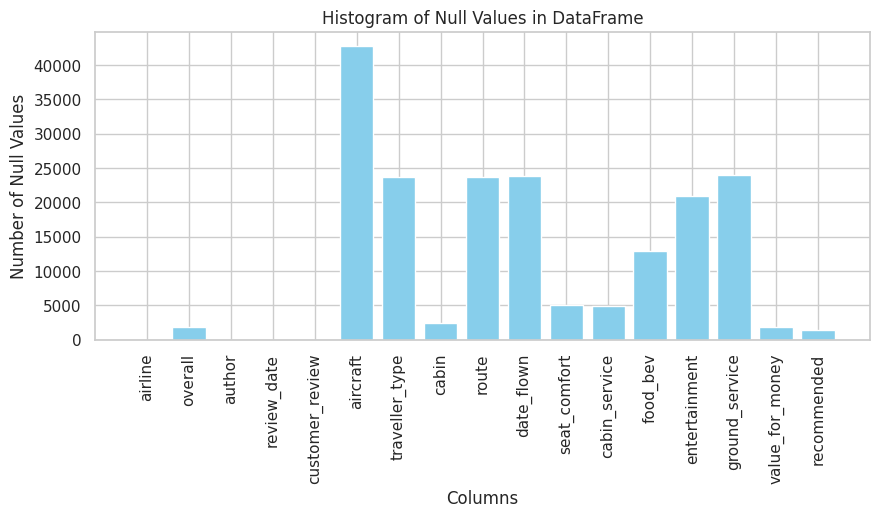

In [ ]:
# Calculate the number of null values in each column
null_counts = df_reset.isnull().sum()

# Plot a histogram
plt.figure(figsize=(10, 4))
plt.bar(null_counts.index, null_counts.values, color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Columns')
plt.ylabel('Number of Null Values')
plt.title('Histogram of Null Values in DataFrame')
plt.show()


In [ ]:
# Drop rows where all columns are NaN
df_without_all_nan = df_reset.dropna(how='all')

In [ ]:
# List of columns to drop
columns_to_drop = ['aircraft','route','traveller_type','date_flown','food_bev','entertainment','ground_service','author','review_date']

# Drop the specified columns
df_without_columns = df_without_all_nan.drop(columns=columns_to_drop, axis=1)

# Display the DataFrame without the specified columns
print("DataFrame without Specified Columns:")
print(df_without_columns.info())


DataFrame without Specified Columns:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 61183 entries, 1 to 61183
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          61183 non-null  object 
 1   overall          59401 non-null  float64
 2   customer_review  61183 non-null  object 
 3   cabin            58705 non-null  object 
 4   seat_comfort     56211 non-null  float64
 5   cabin_service    56240 non-null  float64
 6   value_for_money  59327 non-null  float64
 7   recommended      59761 non-null  object 
dtypes: float64(4), object(4)
memory usage: 4.2+ MB
None


In [ ]:
# Displaying Data
df_without_columns.head()

,airline,overall,customer_review,cabin,seat_comfort,cabin_service,value_for_money,recommended
1,Turkish Airlines,7.0,âœ… Trip Verified | London to Izmir via Istanb...,Economy Class,4.0,5.0,4.0,yes
2,Turkish Airlines,2.0,âœ… Trip Verified | Istanbul to Bucharest. We ...,Economy Class,4.0,1.0,1.0,no
3,Turkish Airlines,3.0,âœ… Trip Verified | Rome to Prishtina via Ista...,Economy Class,1.0,4.0,2.0,no
4,Turkish Airlines,10.0,âœ… Trip Verified | Flew on Turkish Airlines I...,Economy Class,4.0,5.0,5.0,yes
5,Turkish Airlines,1.0,âœ… Trip Verified | Mumbai to Dublin via Istan...,Economy Class,1.0,1.0,1.0,no


In [ ]:
# Getting mathematical summary of data
df_without_columns.describe()

,overall,seat_comfort,cabin_service,value_for_money
count,59401.000000,56211.000000,56240.000000,59327.000000
mean,5.164863,2.959278,3.200231,2.950849
std,3.483701,1.436467,1.568429,1.588433
min,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2.000000,2.000000,1.000000
50%,5.000000,3.000000,3.000000,3.000000
75%,9.000000,4.000000,5.000000,4.000000
max,10.000000,5.000000,5.000000,5.000000


In [ ]:
# Specify the numerical columns for mean imputation
numerical_columns = ['overall', 'seat_comfort', 'cabin_service', 'value_for_money']

# Calculate the mean for each column
mean_values = df_without_columns[numerical_columns].mean()

# Round the mean values to the nearest whole number
mean_values_rounded = mean_values.round()

# Impute missing values with the rounded mean values
df_without_columns[numerical_columns] = df_without_columns[numerical_columns].fillna(mean_values_rounded)


In [ ]:
# Drop rows with null values in the 'cabin' column
df_without_columns = df_without_columns.dropna(subset=['cabin'])

# Reset the index after dropping rows
df_without_columns= df_without_columns.reset_index(drop=True)


In [ ]:
# Calculate the mode of the 'recommended' column
mode_value = df_without_columns['recommended'].mode().iloc[0]

# Fill missing values in the 'recommended' column with the mode
df_without_columns['recommended'] = df_without_columns['recommended'].fillna(mode_value)


In [ ]:
#Getting information of data
df_without_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58705 entries, 0 to 58704
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          58705 non-null  object 
 1   overall          58705 non-null  float64
 2   customer_review  58705 non-null  object 
 3   cabin            58705 non-null  object 
 4   seat_comfort     58705 non-null  float64
 5   cabin_service    58705 non-null  float64
 6   value_for_money  58705 non-null  float64
 7   recommended      58705 non-null  object 
dtypes: float64(4), object(4)
memory usage: 3.6+ MB


In [ ]:
# converting data types of columns in which they should be represented.
df_without_columns['overall'] = df_without_columns['overall'].astype(int)
df_without_columns['seat_comfort'] = df_without_columns['seat_comfort'].astype(int)
df_without_columns['cabin_service'] = df_without_columns['cabin_service'].astype(int)
df_without_columns['value_for_money'] = df_without_columns['value_for_money'].astype(int)

In [ ]:
# Getting unique values count
unique_values = df_without_columns['recommended'].unique()

# Display unique values
print(unique_values)

['yes' 'no']


In [ ]:
# Convert 'yes' to 1 and 'no' to 0 in the 'recommended' column
df_without_columns['recommended'] = df_without_columns['recommended'].replace({'yes': 1, 'no': 0})

# Change the data type of the 'recommended' column to int64
df_without_columns['recommended'] = df_without_columns['recommended'].astype('int64')




In [ ]:
# Rename the 'recommended' column to 'recommended_yes(1)_no(0)'
df_1_final=df_without_columns.rename(columns={'recommended': 'recommended_yes(1)_no(0)'})


In [ ]:
#Dataset view
df_1_final.head()

,airline,overall,customer_review,cabin,seat_comfort,cabin_service,value_for_money,recommended_yes(1)_no(0)
0,Turkish Airlines,7,âœ… Trip Verified | London to Izmir via Istanb...,Economy Class,4,5,4,1
1,Turkish Airlines,2,âœ… Trip Verified | Istanbul to Bucharest. We ...,Economy Class,4,1,1,0
2,Turkish Airlines,3,âœ… Trip Verified | Rome to Prishtina via Ista...,Economy Class,1,4,2,0
3,Turkish Airlines,10,âœ… Trip Verified | Flew on Turkish Airlines I...,Economy Class,4,5,5,1
4,Turkish Airlines,1,âœ… Trip Verified | Mumbai to Dublin via Istan...,Economy Class,1,1,1,0


In [ ]:
# Making copy of dataset
df_final = df_1_final.copy()
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58705 entries, 0 to 58704
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   airline                   58705 non-null  object
 1   overall                   58705 non-null  int64 
 2   customer_review           58705 non-null  object
 3   cabin                     58705 non-null  object
 4   seat_comfort              58705 non-null  int64 
 5   cabin_service             58705 non-null  int64 
 6   value_for_money           58705 non-null  int64 
 7   recommended_yes(1)_no(0)  58705 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 3.6+ MB


In [ ]:
# Rows and columns count of dataset
df_final.shape

(58705, 8)

### **What did you know about your dataset.**

After doing some data cleaning there are total of 8 columns and 58705 rows in dataset.

Columns which are present are:

1.   airline                  (object data type)
2.   overall                  (int64 data type)
3.   customer_review          (object data type)
4.   cabin                    (object data type)
5.   seat_comfort             (int64 data type)
6.   cabin_service            (int64 data type)
7.   value_for_money          (int64 data type)
8.   recommended_yes(1)_no(0) (int64 data type)



### **Understanding Your Variables**

In [ ]:
# Dataset Columns
print("Column Names:")
print("\n")
for column in df_final.columns:
    print(column)


Column Names:


airline
overall
customer_review
cabin
seat_comfort
cabin_service
value_for_money
recommended_yes(1)_no(0)


In [ ]:
# Dataset Describe
df_final.describe()

,overall,seat_comfort,cabin_service,value_for_money,recommended_yes(1)_no(0)
count,58705.000000,58705.000000,58705.000000,58705.000000,58705.000000
mean,5.181807,2.970786,3.199353,2.958555,0.480504
std,3.434045,1.391818,1.520573,1.582131,0.499624
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,2.000000,2.000000,1.000000,0.000000
50%,5.000000,3.000000,3.000000,3.000000,0.000000
75%,9.000000,4.000000,5.000000,4.000000,1.000000
max,10.000000,5.000000,5.000000,5.000000,1.000000


### **Variables Description**



**1.   airline**-Name of airline.

**2.   overall**-Overall represents overall rating given to the trip between 1-10.

**3.   customer_review**- Represents description of review given by customer.

**4    cabin**- Represents type of cabin in which customer has travelled.

**5    seat_comfort**- Represents seat comfort rated between 1-5.

**6    cabin_service**- Represents cabin service rated between 1-5.

**7    value_for_money**- Represents value for money rated between 1-5.

**8    recommended_yes(1)_no(0)**- Represents whether this airline will be recommended by customer or not(1 represents Yes and 0 represents No)


### **Check Unique Values for each variable**

In [ ]:

# Check unique values and their counts for all columns
for column in df_final.columns:
    unique_values_count = df_final[column].nunique()  # Count of unique values
    print(f"\nUnique value count for {column}: {unique_values_count}")


Unique value count for airline: 81

Unique value count for overall: 10

Unique value count for customer_review: 58695

Unique value count for cabin: 4

Unique value count for seat_comfort: 5

Unique value count for cabin_service: 5

Unique value count for value_for_money: 5

Unique value count for recommended_yes(1)_no(0): 2


### **Data Wrangling**

#### **Grouping cabin column to determine how many are willing to recommend the airline.**

In [ ]:
# Group by 'cabin' and count the occurrences of 'recommended_yes(1)_no(0)'
grouped_data = df_final.groupby('cabin')['recommended_yes(1)_no(0)'].value_counts().unstack(fill_value=0)

# Rename the columns for clarity
grouped_data.columns = ['Not Recommended', 'Recommended']

# Display the resulting DataFrame
print(grouped_data)


                 Not Recommended  Recommended
cabin                                        
Business Class              3204         6386
Economy Class              25517        19654
First Class                  571          961
Premium Economy             1205         1207


#### **Determining top 10 Airlines based on total number of customers travelled who gave ratings and reviews.**

In [ ]:
# Use value_counts to count occurrences of each airline
airline_counts = df_final['airline'].value_counts()

# Get the top 10 airlines
top_10_airlines = airline_counts.head(10)

# Display the top 10 airlines
print("Top 10 Airlines based on total number of customers travelled who gave ratings:")
print(top_10_airlines)

Top 10 Airlines based on total number of customers travelled who gave ratings:
American Airlines          2755
United Airlines            2713
British Airways            2642
Spirit Airlines            2172
Emirates                   1716
China Southern Airlines    1685
Frontier Airlines          1546
Ryanair                    1527
Delta Air Lines            1490
Turkish Airlines           1444
Name: airline, dtype: int64


## **Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

 #### **Pie Chart representing Percentage  of Recommended(1) vs. Not Recommended(0)(Univariate)**

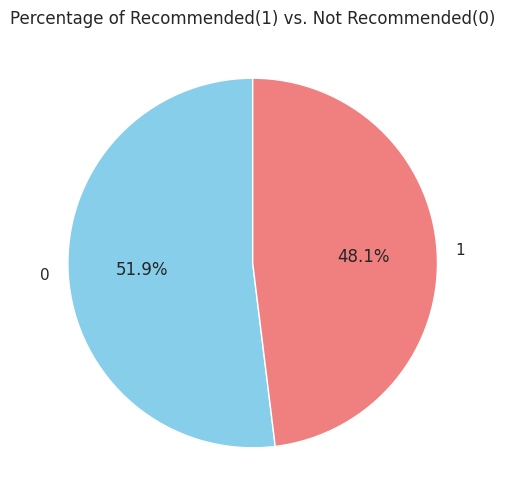

In [ ]:
import matplotlib.pyplot as plt

# Count the occurrences of recommended and not recommended
recommendation_counts = df_final['recommended_yes(1)_no(0)'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(recommendation_counts, labels=recommendation_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], startangle=90)
plt.title('Percentage of Recommended(1) vs. Not Recommended(0)')
plt.show()


##### 1. Why did you pick the specific chart?

The pie chart was chosen for its effectiveness in visually representing the percentage distribution of recommended and not recommended instances in a clear and concise manner. This chart type allows for a quick and intuitive understanding of the proportion of recommendations, making it suitable for showcasing the overall distribution in the 'recommended_yes(1)_no(0)' column.

##### 2. What is/are the insight(s) found from the chart?

The insights that I got from this chart are:

*   Percentage of not recommended(51.9%) is greater than percentage of recommended(48.1%) and this represents that improvements must be made at earliest to retain the customers else business will loose its customers.








##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


The analysis reveals that the percentage of not recommended instances (51.9%) surpasses recommended instances (48.1%). While this highlights areas for improvement in customer satisfaction, it also presents an opportunity for positive business impact through targeted enhancements. Proactive measures addressing customer concerns can lead to increased loyalty, improved reputation, and strategic decision-making, mitigating potential negative growth associated with dissatisfaction.

#### **Column chart representing Recommended vs. Not Recommended with respect to Airline(Bivariate)**

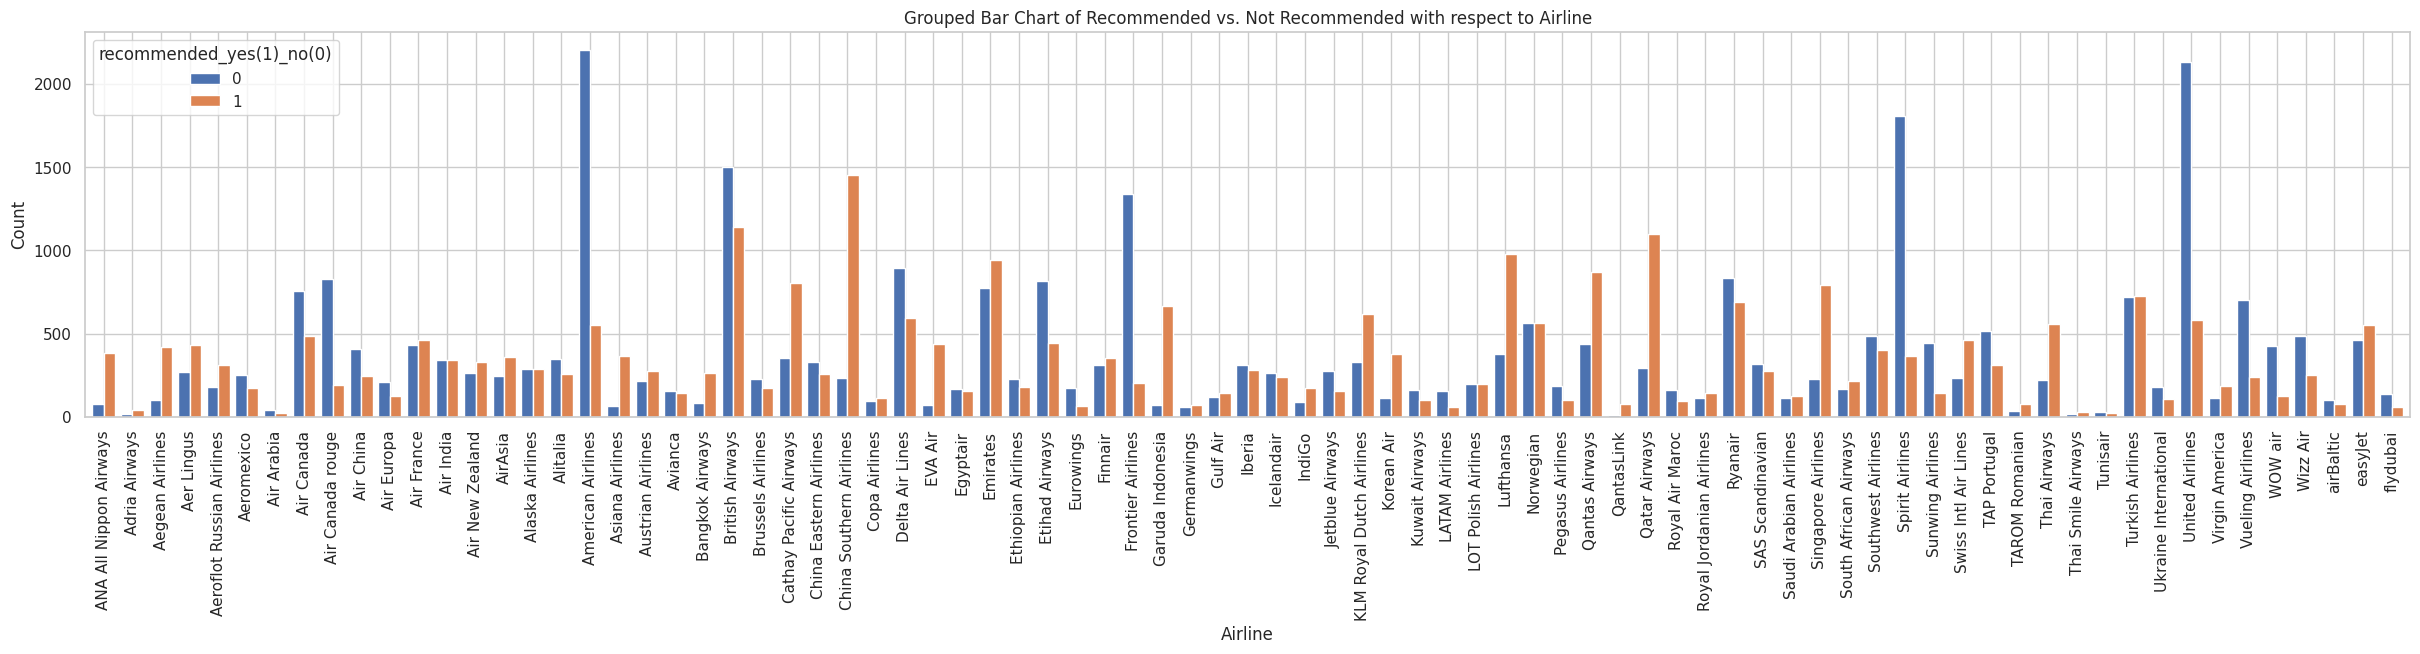

In [ ]:
# Increase the length of the chart
fig, ax = plt.subplots(figsize=(30, 5))  # Adjust the width and height as needed

# Group by 'airline' and 'recommended', then count the occurrences
hist_data = df_final.groupby(['airline', 'recommended_yes(1)_no(0)']).size().unstack()

# Plotting the grouped bar chart
hist_data.plot(kind='bar', ax=ax, width=0.8)

# Set labels and title
plt.xlabel('Airline')
plt.ylabel('Count')
plt.title('Grouped Bar Chart of Recommended vs. Not Recommended with respect to Airline')

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

The grouped bar chart was selected for its effectiveness in visually comparing the counts of recommended and not recommended instances across different airlines. Its suitability for representing categorical data, facilitating multi-categorical comparisons, readability, insights into variability, and visual appeal make it an ideal choice for conveying the distribution of recommendations in a clear and concise manner.

##### 2. What is/are the insight(s) found from the chart?

The insights which i got from the chart are:

*   The top 5 Airlines where recommended is No(0) are:
    

 1.   American Airlines
 2.   United Airlines
 3.   Spirit Airlines
 4.   British Airways
 5.   Frontier Airlines


*   The top 5 airlines where recommended is Yes(1) are:


1.   China Southern Airlines.
2.   Quatar Airways
3.   British Airways
4.   Lufthansa
5.   Emirates
   










    
    
    
    







##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights from the chart highlight opportunities for positive business impact by identifying areas for improvement in major carriers with higher "No" recommendations. Strategic decision-making and the potential adoption of successful practices from airlines with higher "Yes" recommendations offer avenues for enhancing customer loyalty. However, there is a risk of negative growth for airlines with consistently low recommendations, impacting reputation, competitive standing, and customer acquisition. Proactive measures to address customer concerns are crucial for mitigating negative growth and fostering positive business outcomes.

#### **Bar Chart representing Recommended vs. Non-Recommended with respect to Cabin(Bivariate)**

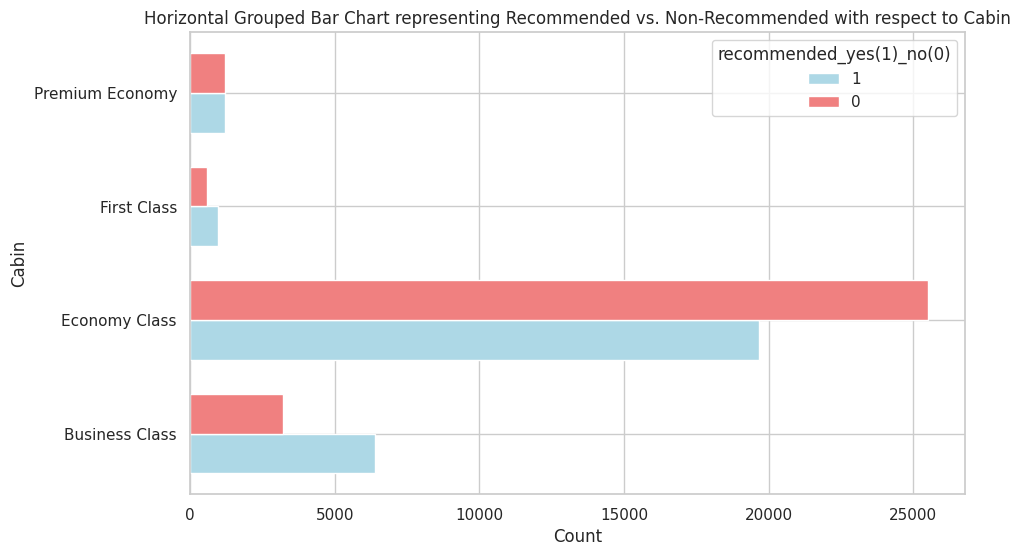

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming df is your DataFrame

# Group the data by 'cabin' and 'recommended', and count the occurrences
grouped_data = df_final.groupby(['cabin', 'recommended_yes(1)_no(0)']).size().unstack()

# Create a horizontal grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Set the bar height
bar_height = 0.35
bar_positions = np.arange(len(grouped_data))

# Plot 'yes' counts
ax.barh(bar_positions, grouped_data[1], height=bar_height, label='1', color='lightblue')

# Plot 'no' counts
ax.barh(bar_positions + bar_height, grouped_data[0], height=bar_height, label='0', color='lightcoral')

# Set y-axis labels and title
ax.set_yticks(bar_positions + bar_height / 2)
ax.set_yticklabels(grouped_data.index)
ax.set_ylabel('Cabin')
ax.set_xlabel('Count')
ax.set_title('Horizontal Grouped Bar Chart representing Recommended vs. Non-Recommended with respect to Cabin')

# Add legend
ax.legend(title='recommended_yes(1)_no(0)', loc='upper right')

# Show the plot
plt.show()


##### 1. Why did you pick the specific chart?

The horizontal grouped bar chart was chosen for its effectiveness in comparing counts across various cabin types concerning recommendations. Its space efficiency, readability, color differentiation, and visual appeal make it a suitable choice for conveying insights about the distribution of recommendations in different cabin categories. The chart provides a clear and engaging representation, facilitating quick interpretation and decision-making for stakeholders.

##### 2. What is/are the insight(s) found from the chart?

It is clear from the above graph that:

Most of the customers are in economy class but recommended(no) count is higher than recommended(yes) count.

For business class recommended(yes) count is higher than recommended(no) count.

For premium class recommended(yes) count is = recommended(no) count.

For first class also recommended(yes) count is higher than recommended(no) count.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights suggest positive business impact opportunities by identifying areas for improvement in the economy class and highlighting the success in the business class. However, potential negative growth may arise from dissatisfaction in the economy class, emphasizing the importance of addressing concerns to prevent customer loss. Consistency and justification for disparities in premium and first class are crucial to maintaining positive growth in these segments. Strategic improvements in the economy class and alignment with positive customer experiences in other classes are key considerations for overall business success.

#### **Column chart representing Distribution of Overall Ratings by Recommendation(Bivariate)**

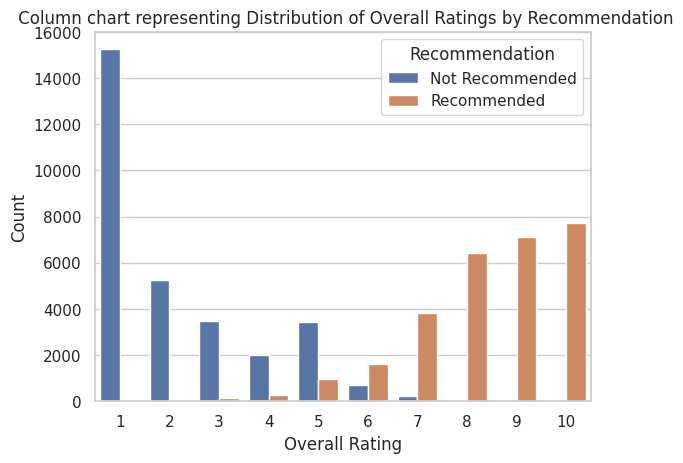

In [ ]:
sns.countplot(x='overall', hue='recommended_yes(1)_no(0)', data=df_final)
plt.title(' Column chart representing Distribution of Overall Ratings by Recommendation')
plt.xlabel('Overall Rating')
plt.ylabel('Count')
plt.legend(title='Recommendation', loc='upper right', labels=['Not Recommended', 'Recommended'])
plt.show()


##### 1. Why did you pick the specific chart?



The overall rating distribution analysis reveals that customers have diverse opinions about the airline's services. The count plot illustrates the frequency of each rating, with a notable concentration around a particular rating indicating a prevalent sentiment. Further, examining the distribution based on recommendations provides insights into how overall ratings may influence customers' likelihood to recommend the airline. This analysis aids in understanding customer satisfaction levels and identifying potential areas for improvement.

##### 2. What is/are the insight(s) found from the chart?

The insights which i got from this chart are:

1.Number of Customers which have given rating=1 are the highest(between 15000-16000).

2.Number of Customers which have given ratings=10 are somewhere between (7500-8000).

3.From the graph its clearly visible that customer who have given rating from 1 to 5 are recommending less to others whereas customers who have given rating from 6 to 10 are recommending more to others.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**
The insights suggest opportunities for positive impact by identifying improvement areas, promoting positive customer experiences, and enhancing customer loyalty through targeted initiatives.

**Potential Negative Growth:**
The high number of low ratings indicates potential negative growth, impacting brand image and customer recommendations. Addressing dissatisfactions is crucial to mitigate negative trends and foster positive business outcomes.

#### **Box Plot representing Ratings by Attribute and Recommended(Multivariate)**

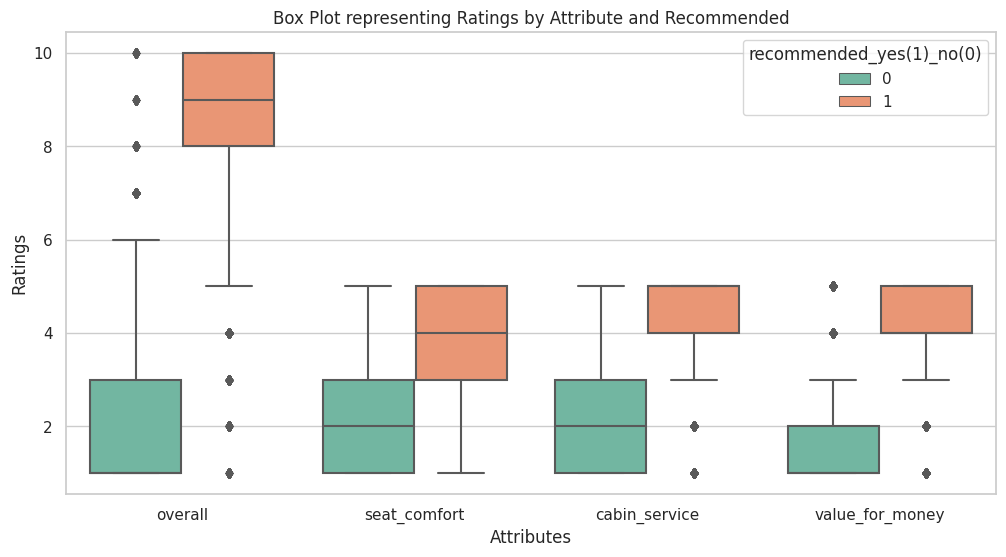

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a single box plot for 'overall', 'seat_comfort', and 'cabin_service' with respect to 'recommended'
plt.figure(figsize=(12, 6))

sns.boxplot(data=df_final.melt(id_vars=['recommended_yes(1)_no(0)'], value_vars=['overall', 'seat_comfort', 'cabin_service','value_for_money']),
            x='variable', y='value', hue='recommended_yes(1)_no(0)', palette="Set2")

# Set labels and title
plt.xlabel('Attributes')
plt.ylabel('Ratings')
plt.title('Box Plot representing Ratings by Attribute and Recommended')

# Show the plot
plt.show()


In [ ]:
df_final.head()

,airline,overall,customer_review,cabin,seat_comfort,cabin_service,value_for_money,recommended_yes(1)_no(0)
0,Turkish Airlines,7,âœ… Trip Verified | London to Izmir via Istanb...,Economy Class,4,5,4,1
1,Turkish Airlines,2,âœ… Trip Verified | Istanbul to Bucharest. We ...,Economy Class,4,1,1,0
2,Turkish Airlines,3,âœ… Trip Verified | Rome to Prishtina via Ista...,Economy Class,1,4,2,0
3,Turkish Airlines,10,âœ… Trip Verified | Flew on Turkish Airlines I...,Economy Class,4,5,5,1
4,Turkish Airlines,1,âœ… Trip Verified | Mumbai to Dublin via Istan...,Economy Class,1,1,1,0


##### 1. Why did you pick the specific chart?

The box plot was chosen for its effectiveness in comparing the distributions of ratings across attributes (overall, seat comfort, cabin_service,value_for_money) concerning recommendations. Its ability to handle multiple variables, identify outliers, and visually communicate the impact of attributes on recommendations makes it a suitable choice. The chart's aesthetic appeal and clear representation enhance its utility in conveying insights about customer ratings in relation to recommendations.

##### 2. What is/are the insight(s) found from the chart?



The insight that I found from this chart is that overall,seat_comfort and cabin_service features are not independent features rather they are dependent on each other and correlated with each other.

Also in overall column it visible that some customers who are giving overall rating like 7,8,9,10 are also in category of recommended(no)
and some customers whose overall rating are 1,2,3,4 are in category of recommended(yes).Hence these can be treated as outliers if valid reason for these type of customers is not there else they won't be treated as outlier.Similarly there are some outliers in cabin_service value_for_money column also.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The identified insights indicate a positive business impact by recognizing feature dependencies and optimizing the overall customer experience. However, potential negative growth may arise from outliers, where inconsistencies between overall ratings and recommendations could lead to customer confusion and impact trust. Addressing these outliers is crucial to maintain positive customer relationships and mitigate the risk of negative growth.

#### **Corelation Heatmap**

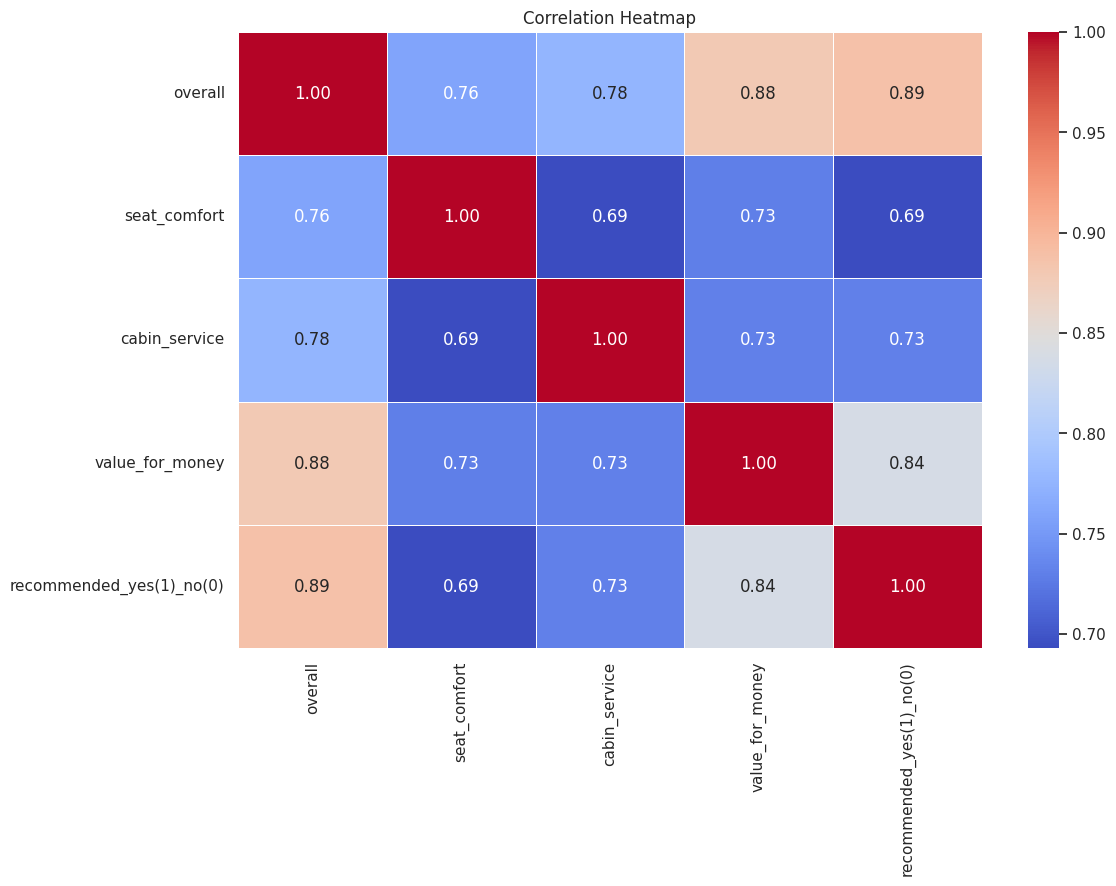

In [ ]:
# Correlation Heatmap visualization code
# Select numerical columns for the correlation matrix
numerical_columns = df_final.select_dtypes(include=['int64', 'float64']).columns

# Compute the correlation matrix
correlation_matrix = df_final[numerical_columns].corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix,annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

##### 1. Why did you pick the specific chart?

The correlation heatmap was chosen to visually represent relationships between numerical variables in the dataset. Its color-coded cells provide a quick and intuitive way to grasp the strength and direction of correlations. This chart is effective for identifying patterns, conducting multivariate analysis, aiding in feature selection, and communicating insights clearly to both technical and non-technical audiences.


##### 2. What is/are the insight(s) found from the chart?

The insights that I found from this chart is that there is a good correlation between the features like overall,cabin_service,value_for_money,seat_comfort and recommended_yes(1)_no(0).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The positive correlation between passenger ratings for overall experience, cabin service, value for money, seat comfort, and the likelihood of recommending the service suggests potential positive business impacts. Higher ratings in these areas may lead to increased customer satisfaction, repeat business, and positive word-of-mouth recommendations. However, it is essential to maintain and enhance these aspects to prevent potential negative growth and consider other factors contributing to overall customer satisfaction.

#### **Pairplot**

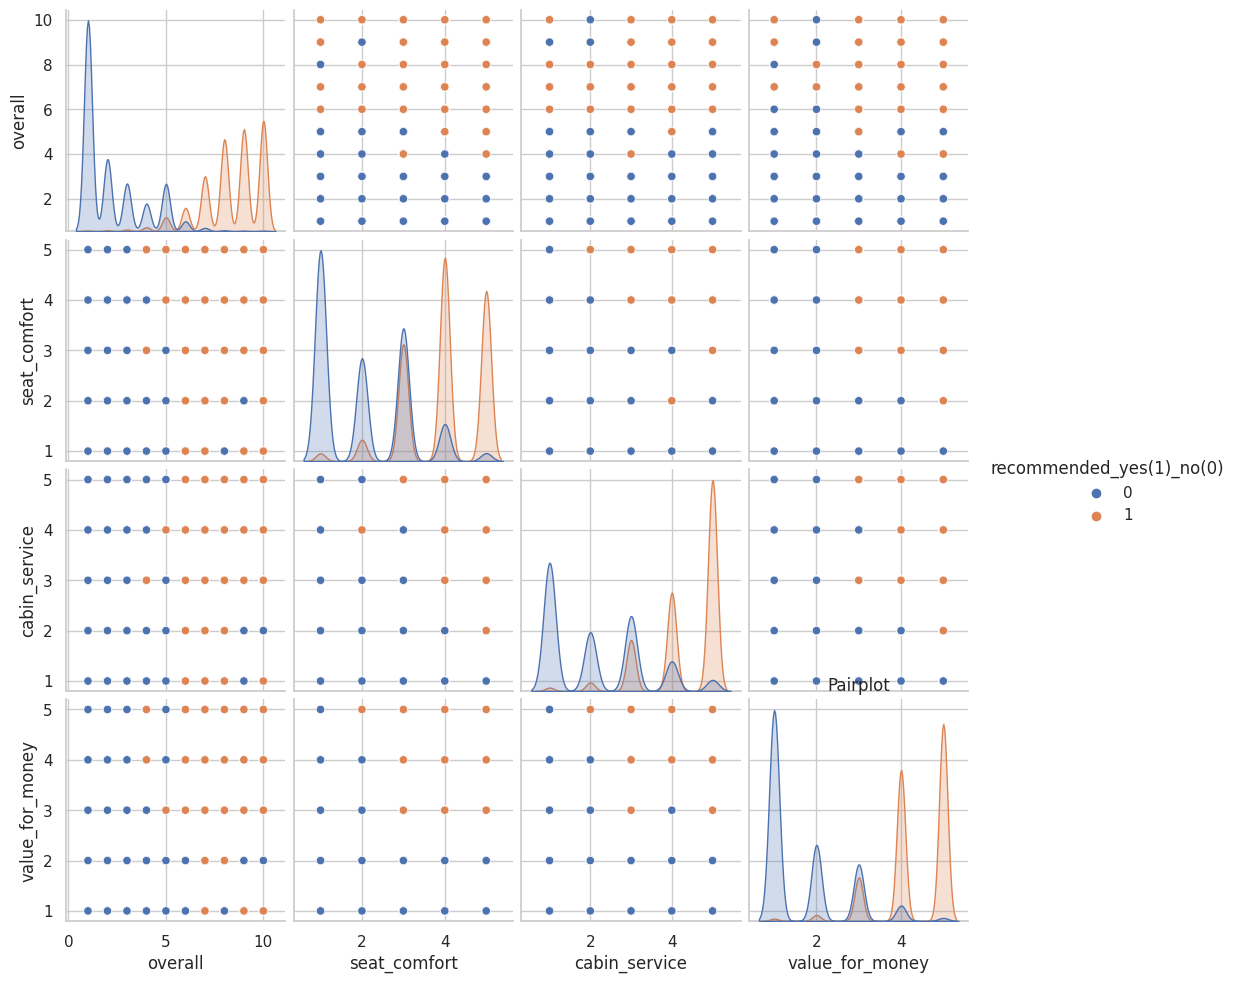

In [ ]:
pairplot_df=df_final.copy()
# Plot the pair plot using Seaborn
sns.pairplot(pairplot_df,hue='recommended_yes(1)_no(0)')
plt.title("Pairplot")

# Show the plot
plt.show()

##### 2. What is/are the insight(s) found from the chart?

It is clear from the above chart that:

 Data points of recommended(yes) and recommended(no) are very clearly separable in most of the cases and also there is linear correlation between the variables.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the clear separability of recommended (yes) and recommended (no) data points, along with observed linear correlations between variables, offer opportunities for positive business impact. Leveraging these insights can optimize processes and potentially increase positive recommendations. However, caution is needed to avoid over-reliance on linear relationships, as neglecting non-linear patterns or misunderstanding causation could lead to limited growth potential or misguided strategies. A balanced approach considering both linear and non-linear aspects is crucial for maximizing positive business impact.

## **Data Preprocessing**

###  **Handling Outliers**

#### **Box Plot is being used to detect outliers**

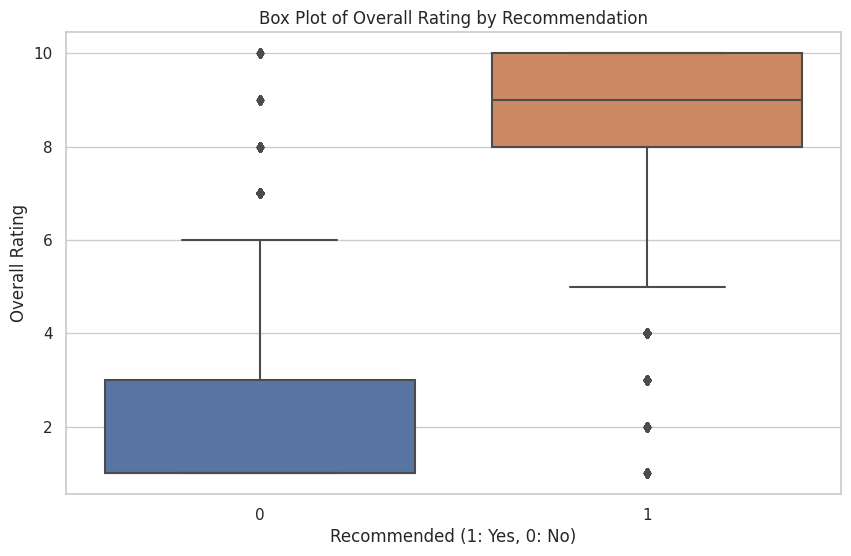

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Box plot
sns.boxplot(x='recommended_yes(1)_no(0)', y='overall', data=df_final)

# Set labels and title
plt.xlabel('Recommended (1: Yes, 0: No)')
plt.ylabel('Overall Rating')
plt.title('Box Plot of Overall Rating by Recommendation')

# Show the plot
plt.show()



In overall column it visible that some customers who are giving overall rating like 7,8,9,10 are also in category of recommended(no)
and some customers whose overall rating are 1,2,3,4 are in category of recommended(yes).Hence these can be treated as outliers if valid reason for these type of customers is not there else they won't be treated as outlier.Similarly there are some outliers in cabin_service value_for_money column also.

In [ ]:
# Handling Outliers & Outlier treatments
#filtering data in which customers have given overall rating (1,2,3,4) but still recommended is yes.
filtered_data = df_final[(df_final['overall'].isin([1, 2, 3, 4])) & (df_final['recommended_yes(1)_no(0)'] == 1)]
#filtering data in which customers have given overall rating (7,8,9,10) but still recommended is no.
filtered_data1 = df_final[(df_final['overall'].isin([7, 8, 9, 10])) & (df_final['recommended_yes(1)_no(0)'] == 0)]

In [ ]:
# Printing outliers
print(filtered_data.shape)
filtered_data.head(5)


(525, 8)


,airline,overall,customer_review,cabin,seat_comfort,cabin_service,value_for_money,recommended_yes(1)_no(0)
87,Turkish Airlines,4,âœ… Trip Verified | Istanbul to Tashkent. Got ...,Economy Class,2,3,3,1
101,Turkish Airlines,2,âœ… Trip Verified | Belgrade to Kiev via Istan...,Economy Class,5,5,2,1
124,Turkish Airlines,3,âœ… Trip Verified | Frankfurt to Ankara. Check...,Economy Class,3,4,4,1
271,Turkish Airlines,3,âœ… Trip Verified | Istanbul to Athens. Overal...,Economy Class,3,4,5,1
474,Turkish Airlines,4,Montreal to Budapest via Istanbul. I had quite...,Economy Class,2,3,3,1


In [ ]:
# Printing outliers
print(filtered_data1.shape)
filtered_data1.head(5)

(384, 8)


,airline,overall,customer_review,cabin,seat_comfort,cabin_service,value_for_money,recommended_yes(1)_no(0)
76,Turkish Airlines,7,âœ… Trip Verified | Sharm el Sheikh to Frankfu...,Economy Class,4,4,3,0
176,Turkish Airlines,10,âœ… Trip Verified | Istanbul to Izmir return. ...,Economy Class,5,5,5,0
211,Turkish Airlines,7,Not Verified | Moscow to Antalya. Flew Turkish...,Economy Class,5,4,3,0
640,Turkish Airlines,10,Dublin to Istanbul with Turkish Airlines. Flig...,Business Class,5,5,5,0
710,Turkish Airlines,8,Pisa to Manila via Istambul. I bought this fli...,Economy Class,2,3,3,0


#### **Removing outliers**

In [ ]:
# dropping outliers from df_final.
df_final_ = df_final.drop(filtered_data.index, axis=0)
df_final_1 = df_final_.drop(filtered_data1.index, axis=0)

# Reset index
df_final_1_reset = df_final_1.reset_index(drop=True)
df_final_1_reset.shape



(57796, 8)

#### **What all outlier treatment techniques have been used and why are those techniques used?**

First of all I detected outliers using box plot and then filtered out outliers which I detected using box plot.After that I dropped the outlier data from my dataframe.In the above code it's clearly commented out how I did this.

In [ ]:
df_final1=df_final_1_reset.copy()

In [ ]:
df_final1.head()

,airline,overall,customer_review,cabin,seat_comfort,cabin_service,value_for_money,recommended_yes(1)_no(0)
0,Turkish Airlines,7,âœ… Trip Verified | London to Izmir via Istanb...,Economy Class,4,5,4,1
1,Turkish Airlines,2,âœ… Trip Verified | Istanbul to Bucharest. We ...,Economy Class,4,1,1,0
2,Turkish Airlines,3,âœ… Trip Verified | Rome to Prishtina via Ista...,Economy Class,1,4,2,0
3,Turkish Airlines,10,âœ… Trip Verified | Flew on Turkish Airlines I...,Economy Class,4,5,5,1
4,Turkish Airlines,1,âœ… Trip Verified | Mumbai to Dublin via Istan...,Economy Class,1,1,1,0


### **Categorical Encoding**

####**Performed one hot encoding on cabin and airline column as they were categorical column**

In [ ]:
# Encode categorical columns
#one hot encoding on cabin and airline column.
df_final1_ = pd.get_dummies(df_final1, columns=['cabin'], prefix='cabin')
df_final2=pd.get_dummies(df_final1_,columns=['airline'],prefix='airline')

# Display the updated DataFrame
df_final2.head()


,overall,customer_review,seat_comfort,cabin_service,value_for_money,recommended_yes(1)_no(0),cabin_Business Class,cabin_Economy Class,cabin_First Class,cabin_Premium Economy,...,airline_Turkish Airlines,airline_Ukraine International,airline_United Airlines,airline_Virgin America,airline_Vueling Airlines,airline_WOW air,airline_Wizz Air,airline_airBaltic,airline_easyJet,airline_flydubai
0,7,âœ… Trip Verified | London to Izmir via Istanb...,4,5,4,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1,2,âœ… Trip Verified | Istanbul to Bucharest. We ...,4,1,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2,3,âœ… Trip Verified | Rome to Prishtina via Ista...,1,4,2,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,10,âœ… Trip Verified | Flew on Turkish Airlines I...,4,5,5,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1,âœ… Trip Verified | Mumbai to Dublin via Istan...,1,1,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


###  **Performing sentiment analysis on customer_review column to determine whether it is a positive,negative or neutral review**

#### **Data Cleaning and Preprocessing of customer_review column**

**Data Cleaning**

In [ ]:
import pandas as pd
import re
#removing first sentence of every review in customer_review column as in most of the cases it is like'âœ… Trip Verified or not verified | current place to destination.'

def remove_pattern(text):
    # Define a pattern to capture everything after the first full stop
    pattern = r'^.*?\|[^\.]+\. (.+)$'

    # Use re.match to check if the pattern is present in the text
    match = re.match(pattern, text)

    # If there's a match, return the part after the first full stop, else return the original text
    cleaned_text = match.group(1) if match else text

    return cleaned_text

# Apply the function to the 'customer_review' column
df_final2['customer_review'] = df_final2['customer_review'].apply(remove_pattern)

# Display the modified DataFrame
print(df_final2)


       overall                                    customer_review  \
0            7  First time Iâ€™d flown TK. I found them very g...   
1            2  We make our check in in the airport, they Take...   
2            3  I flew with this company several times in the ...   
3           10  Turkish Airlines has consistently maintained i...   
4            1  Never book Turkish airlines if you are traveli...   
...        ...                                                ...   
57791        8  Three return flights Berlin to Kiev Boryspol i...   
57792        8  Berlin-Kiev-Berlin B737-400. The return flight...   
57793        5  Some 5 flights within couple months. Most of t...   
57794        8  Vienna-Kiev return in Coach. Check in fine at ...   
57795        1  I recently booked a trip with travelocity. I f...   

       seat_comfort  cabin_service  value_for_money  recommended_yes(1)_no(0)  \
0                 4              5                4                         1   
1        

In [ ]:
# Data set view
df_final2.head()

,overall,customer_review,seat_comfort,cabin_service,value_for_money,recommended_yes(1)_no(0),cabin_Business Class,cabin_Economy Class,cabin_First Class,cabin_Premium Economy,...,airline_Turkish Airlines,airline_Ukraine International,airline_United Airlines,airline_Virgin America,airline_Vueling Airlines,airline_WOW air,airline_Wizz Air,airline_airBaltic,airline_easyJet,airline_flydubai
0,7,First time Iâ€™d flown TK. I found them very g...,4,5,4,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1,2,"We make our check in in the airport, they Take...",4,1,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2,3,I flew with this company several times in the ...,1,4,2,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,10,Turkish Airlines has consistently maintained i...,4,5,5,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1,Never book Turkish airlines if you are traveli...,1,1,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


**Data Preprocessing**

In [ ]:
# Download the Punkt tokenizer model
nltk.download('punkt')
# Download NLTK resources
nltk.download('stopwords')

# Load spaCy model for lemmatization
nlp = spacy.load('en_core_web_sm')

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove URLs and mentions
    text = re.sub(r'http\S+|www\S+|@[^\s]+', '', text)

    # Remove hashtags
    text = re.sub(r'#', '', text)

    # Remove punctuation
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)

    # Tokenize the text
    tokens = nltk.word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization using spaCy
    lemmatized_tokens = [token.lemma_ for token in nlp(" ".join(tokens))]

    # Remove special characters
    lemmatized_tokens = [re.sub(r'[^a-zA-Z0-9]', '', token) for token in lemmatized_tokens]

    # Remove empty tokens
    lemmatized_tokens = [token for token in lemmatized_tokens if token]

    return lemmatized_tokens



# Apply preprocessing to the 'text_column' and create a new column 'preprocessed_text'
df_final2['customer_review'] = df_final2['customer_review'].apply(preprocess_text)

# Display the DataFrame
print(df_final2)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


       overall                                    customer_review  \
0            7  [first, time, i, d, fly, tk, find, good, air, ...   
1            2  [make, check, airport, take, luggage, go, gate...   
2            3  [fly, company, several, time, past, year, hone...   
3           10  [turkish, airline, consistently, maintain, qua...   
4            1  [never, book, turkish, airline, travel, dublin...   
...        ...                                                ...   
57791        8  [three, return, flight, berlin, kiev, boryspol...   
57792        8  [berlinkievberlin, b737400, return, flight, de...   
57793        5  [5, flight, within, couple, month, time, troub...   
57794        8  [viennakiev, return, coach, check, fine, airpo...   
57795        1  [recently, book, trip, travelocity, fly, delta...   

       seat_comfort  cabin_service  value_for_money  recommended_yes(1)_no(0)  \
0                 4              5                4                         1   
1        

In [ ]:
# Convert tokens back to strings
df_final2['customer_review'] = df_final2['customer_review'].apply(lambda tokens: ' '.join(tokens))
df_final2.head()

,overall,customer_review,seat_comfort,cabin_service,value_for_money,recommended_yes(1)_no(0),cabin_Business Class,cabin_Economy Class,cabin_First Class,cabin_Premium Economy,...,airline_Turkish Airlines,airline_Ukraine International,airline_United Airlines,airline_Virgin America,airline_Vueling Airlines,airline_WOW air,airline_Wizz Air,airline_airBaltic,airline_easyJet,airline_flydubai
0,7,first time i d fly tk find good air cabin crew...,4,5,4,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1,2,make check airport take luggage go gate gate s...,4,1,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2,3,fly company several time past year honestly sa...,1,4,2,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,10,turkish airline consistently maintain quality ...,4,5,5,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1,never book turkish airline travel dublin mumba...,1,1,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


#### **Determining the sentiment of each customer review using Sentiment Intensity Analyzer**

In [ ]:
# Download the vader_lexicon resource
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
# Download the vader_lexicon resource
nltk.download('vader_lexicon')

# Function to get sentiment
def get_sentiment(text):
    analyzer = SentimentIntensityAnalyzer()
    sentiment_score = analyzer.polarity_scores(text)['compound']

    if sentiment_score >= 0.05:
        return 'positive'
    elif sentiment_score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis to create a new column 'sentiment'
df_final2['sentiment'] = df_final2['customer_review'].apply(get_sentiment)

# Display the DataFrame with the 'sentiment' column
df_final2.head()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,overall,customer_review,seat_comfort,cabin_service,value_for_money,recommended_yes(1)_no(0),cabin_Business Class,cabin_Economy Class,cabin_First Class,cabin_Premium Economy,...,airline_Ukraine International,airline_United Airlines,airline_Virgin America,airline_Vueling Airlines,airline_WOW air,airline_Wizz Air,airline_airBaltic,airline_easyJet,airline_flydubai,sentiment
0,7,first time i d fly tk find good air cabin crew...,4,5,4,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,positive
1,2,make check airport take luggage go gate gate s...,4,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,positive
2,3,fly company several time past year honestly sa...,1,4,2,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,negative
3,10,turkish airline consistently maintain quality ...,4,5,5,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,positive
4,1,never book turkish airline travel dublin mumba...,1,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,negative


Now as it can be seen that new feature named sentiment has been added in the dataframe.In this column unique values are postive,neautral and negative.Each customer review has been assigned a sentiment based on customer_review column.

###**Splitting Dataset into Training and Testing**

In [ ]:
#Dropping sentiment and customer_review column to build a machine learning model to predict recommended column.
columns_to_drop=['sentiment','customer_review']
df_final3 = df_final2.drop(columns=columns_to_drop)

In [ ]:
# Define the features (x) and the target variable (y)
x = df_final3.drop('recommended_yes(1)_no(0)', axis=1)  # Drop the target column to get the features
y = df_final3['recommended_yes(1)_no(0)']  # Get the target variable

 # split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### **Scaling**

Now in the dataset overall column has rating between 1-10,cabin_service has rating between 1-5,seat_comfort column has also rating between 1-5 and value_for_money column has also rating between 1-5.So there seems no need to scale the data by techniques like:
1. Standard Scaler
2. Minmax Scaler
3. Robust scaler

Hence scaling has not been performed on this data because there are discrete values.

###**Checking for imbalanced Data**

In [ ]:
# Count occurrences of 1 and 0 in the 'target' column
count_values = df_final3['recommended_yes(1)_no(0)'].value_counts()

# Display the result
print("Count of 1 and 0 in the 'target' column:")
print(count_values)

Count of 1 and 0 in the 'target' column:
0    30113
1    27683
Name: recommended_yes(1)_no(0), dtype: int64


Count of 0 class is 30497 and for 1 class is 28208.Hence data is balanced there is no need to use balancing technique like Undersampling,Oversampling or SMOTE

##**Building Machine Learning model.**

### **Model-1:Logistic Regression Model**

####**Logistic Regression Model**

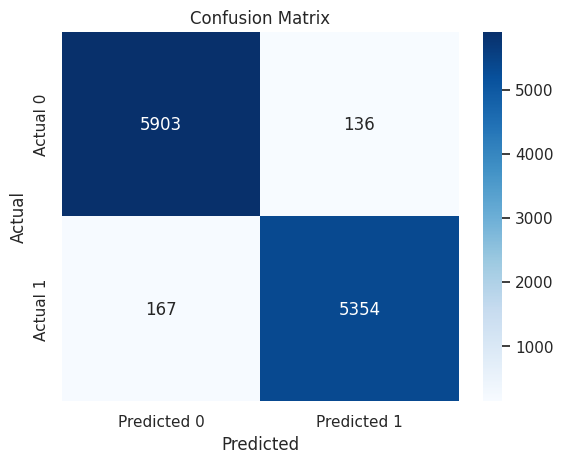

Accuracy:0.9737889273356402
Precision: 0.98
Recall: 0.97
F1 Score: 0.97


In [ ]:
# Create a logistic regression model
model = LogisticRegression(fit_intercept=True,max_iter=10000)
# Train the model on the training data
model.fit(x_train, y_train)
# Make predictions on the testing data
y_pred = model.predict(x_test)
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot a confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy:{accuracy}')

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)


# Display precision, recall, and F1 score
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")



####**Logistic Regression Model with Stratefied K Fold Cross validation**

Average Accuracy: 0.9725759384533758
Average Precision: 0.9733468902501172
Average Recall: 0.969295224502037
Average F1 Score: 0.9713142408766984


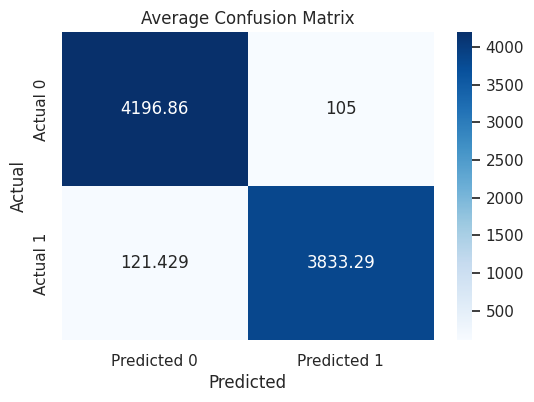

In [ ]:
# Define the number of splits for StratifiedKFold
n_splits = 7  #  can adjust this based on your preference

# Initialize StratifiedKFold
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Lists to store evaluation metrics for each fold
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
conf_matrices = []

# Perform stratified cross-validation
for train_index, test_index in stratified_kfold.split(x, y):
    x_train_cv, x_test_cv = x.iloc[train_index], x.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

    # Create and train the logistic regression model
    model_cv = LogisticRegression(fit_intercept=True, max_iter=10000)
    model_cv.fit(x_train_cv, y_train_cv)

    # Make predictions on the testing data
    y_pred_cv = model_cv.predict(x_test_cv)

     # Evaluate the model
    accuracy_scores.append(accuracy_score(y_test_cv, y_pred_cv))
    precision_scores.append(precision_score(y_test_cv, y_pred_cv))
    recall_scores.append(recall_score(y_test_cv, y_pred_cv))
    f1_scores.append(f1_score(y_test_cv, y_pred_cv))
    conf_matrices.append(confusion_matrix(y_test_cv, y_pred_cv))

# Print the average evaluation metrics across all folds
print(f"Average Accuracy: {np.mean(accuracy_scores)}")
print(f"Average Precision: {np.mean(precision_scores)}")
print(f"Average Recall: {np.mean(recall_scores)}")
print(f"Average F1 Score: {np.mean(f1_scores)}")

# Prettified confusion matrix for the average across all folds
average_conf_matrix = np.mean(conf_matrices, axis=0)

plt.figure(figsize=(6, 4))
sns.heatmap(average_conf_matrix, annot=True, fmt="g", cmap="Blues",  # Use "g" for general formatting
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Average Confusion Matrix')
plt.show()

**Determining best value of k to be used in Stratefied Cross Validation on Logistic Regression model(Hyperparameter tuning)**

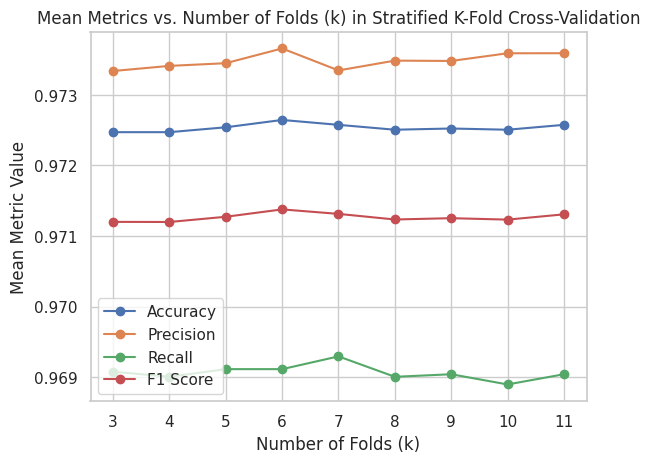

In [ ]:

# Define the range of k values
k_values = range(3, 12)
mean_accuracy_scores = []
mean_precision_scores = []
mean_recall_scores = []
mean_f1_scores = []

for k in k_values:
    # Initialize StratifiedKFold with current k
    stratified_kfold = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

    # Lists to store evaluation metrics for each fold
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []

    # Perform stratified cross-validation
    for train_index, test_index in stratified_kfold.split(x, y):
        x_train_cv, x_test_cv = x.iloc[train_index], x.iloc[test_index]
        y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

        # Create and train the logistic regression model
        model_cv = LogisticRegression(fit_intercept=True, max_iter=10000)
        model_cv.fit(x_train_cv, y_train_cv)

        # Make predictions on the testing data
        y_pred_cv = model_cv.predict(x_test_cv)

        # Evaluate the model and store metrics
        accuracy_scores.append(accuracy_score(y_test_cv, y_pred_cv))
        precision_scores.append(precision_score(y_test_cv, y_pred_cv))
        recall_scores.append(recall_score(y_test_cv, y_pred_cv))
        f1_scores.append(f1_score(y_test_cv, y_pred_cv))

    # Calculate the mean metrics across all folds for the current k
    mean_accuracy = np.mean(accuracy_scores)
    mean_precision = np.mean(precision_scores)
    mean_recall = np.mean(recall_scores)
    mean_f1 = np.mean(f1_scores)

    mean_accuracy_scores.append(mean_accuracy)
    mean_precision_scores.append(mean_precision)
    mean_recall_scores.append(mean_recall)
    mean_f1_scores.append(mean_f1)

# Plot the results
plt.plot(k_values, mean_accuracy_scores, label='Accuracy', marker='o')
plt.plot(k_values, mean_precision_scores, label='Precision', marker='o')
plt.plot(k_values, mean_recall_scores, label='Recall', marker='o')
plt.plot(k_values, mean_f1_scores, label='F1 Score', marker='o')

plt.title('Mean Metrics vs. Number of Folds (k) in Stratified K-Fold Cross-Validation')
plt.xlabel('Number of Folds (k)')
plt.ylabel('Mean Metric Value')
plt.legend()
plt.grid(True)
plt.show()


The best value of k to be used for implementing Stratefied Cross Validation on Logistic Regression model is 7 with respect to Recall Evaluation Metric.

####**Comparison between Logistic Regression Model and Logistic Regression Model with Stratefied K-Fold Cross Validation**

**Logistic Regression Model**

Recall- 0.97(97.00%)

**Logistic Regression Model with Stratefied Cross Validation**

Recall- 0.9692(96.92%)



Hence Logistic Regression Model will be used to make prediction on unseen data because its Recall(0.97) is slightly higher than Recall(0.9692) of Logistic Regression Model with Stratefied K Fold Cross Validation.

### **Model-2:Random Forest Model**

####**Random Forest Model**

Accuracy: 0.9699826989619377
Precision: 0.9691693870148712
Recall: 0.9679405904727404
F1 Score: 0.9685545990031716


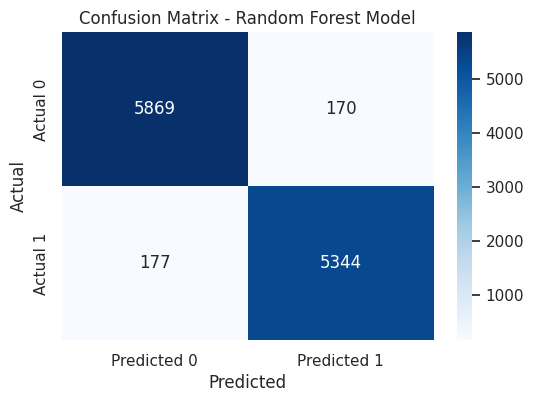

In [ ]:
# Create a Random Forest model
rf_model = RandomForestClassifier(n_estimators=150, random_state=42)

# Train the model on the training data
rf_model.fit(x_train, y_train)

# Make predictions on the testing data
y_pred_rf = rf_model.predict(x_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Print the evaluation metrics
print(f"Accuracy: {accuracy_rf}")
print(f"Precision: {precision_rf}")
print(f"Recall: {recall_rf}")
print(f"F1 Score: {f1_rf}")

# Plot a prettified confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest Model')
plt.show()

**Determining best value of n_estimators to be used in Random Forest Model.**

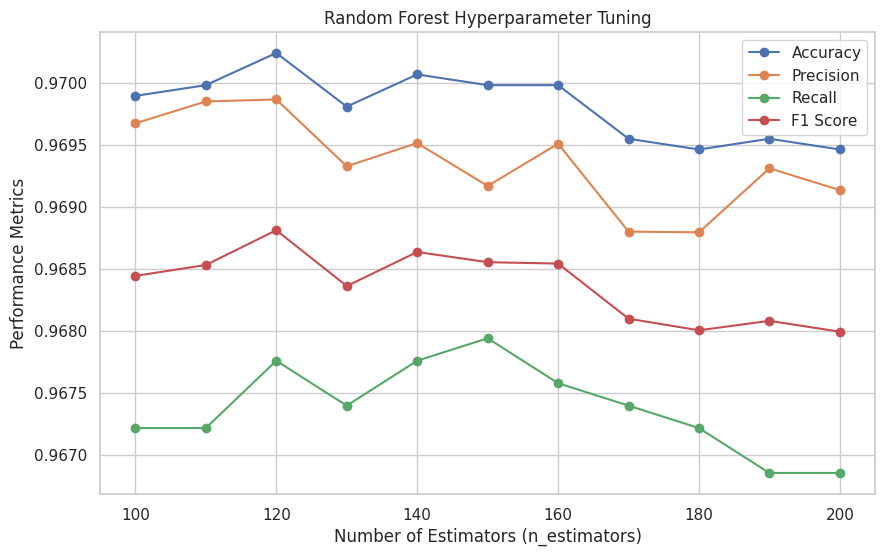

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Set a seed for reproducibility
random_seed = 42


# Define the range of n_estimators values
n_estimators_values = range(100, 201, 10)

# Lists to store evaluation metrics for each n_estimators value
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Iterate over different values of n_estimators
for n_estimators in n_estimators_values:
    # Create a Random Forest model with the current n_estimators value and set the random seed
    rf_model = RandomForestClassifier(n_estimators=n_estimators, random_state=random_seed)

    # Train the model on the training data
    rf_model.fit(x_train, y_train)

    # Make predictions on the testing data
    y_pred_rf = rf_model.predict(x_test)

    # Evaluate the model and store performance metrics
    accuracy_scores.append(accuracy_score(y_test, y_pred_rf))
    precision_scores.append(precision_score(y_test, y_pred_rf))
    recall_scores.append(recall_score(y_test, y_pred_rf))
    f1_scores.append(f1_score(y_test, y_pred_rf))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, accuracy_scores, label='Accuracy', marker='o')
plt.plot(n_estimators_values, precision_scores, label='Precision', marker='o')
plt.plot(n_estimators_values, recall_scores, label='Recall', marker='o')
plt.plot(n_estimators_values, f1_scores, label='F1 Score', marker='o')

plt.title('Random Forest Hyperparameter Tuning')
plt.xlabel('Number of Estimators (n_estimators)')
plt.ylabel('Performance Metrics')
plt.legend()
plt.grid(True)
plt.show()


From the above graph it is clear that when n_estimators value is set to 150 then Recall is highest.So in the above model n_estimators will be set to 150.

#### **Random Forest Model with Stratefied K Fold Cross Validation**

Accuracy Scores: [0.9689446366782007, 0.9678172852322865, 0.9704126654554892, 0.9691149753438879, 0.9694610260403149]
Precision Scores: [0.9654800431499461, 0.9657348963029756, 0.974255979550849, 0.9691973183547744, 0.9683715886499187]
Recall Scores: [0.9698392631388839, 0.9671302149178256, 0.9636987538378183, 0.966221098265896, 0.9678468208092486]
F1 Scores: [0.967654743670601, 0.9664320519761777, 0.9689486108589068, 0.9677069199457259, 0.9681091336164063]
Average Accuracy: 0.9691501177500358
Average Precision: 0.9686079652016927
Average Recall: 0.9669472301939346
Average F1 Score: 0.9677702920135636


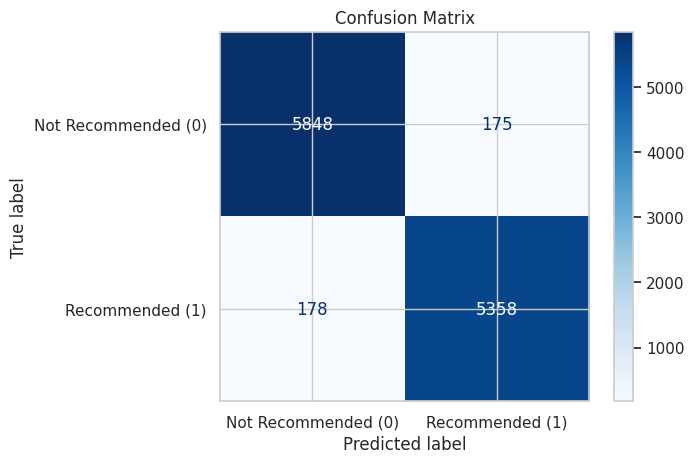

In [ ]:
# Initialize Stratified K-Fold Cross-Validation
k = 5
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Initialize lists to store the scores
accuracy_scores, precision_scores, recall_scores, f1_scores = [], [], [], []
conf_matrices = []

# Iterate over the folds
for train_index, val_index in skf.split(x, y):
    # Split the data into training and validation sets
    x_train, x_val = x.iloc[train_index], x.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    # Initialize and train the model
    model = RandomForestClassifier(random_state=42)
    model.fit(x_train, y_train)

    # Perform predictions on the validation set
    y_pred = model.predict(x_val)

    # Calculate the evaluation metrics
    accuracy_scores.append(accuracy_score(y_val, y_pred))
    precision_scores.append(precision_score(y_val, y_pred))
    recall_scores.append(recall_score(y_val, y_pred))
    f1_scores.append(f1_score(y_val, y_pred))

    # Calculate and store the confusion matrix
    conf_matrices.append(confusion_matrix(y_val, y_pred))

# Print the scores
print("Accuracy Scores:", accuracy_scores)
print("Precision Scores:", precision_scores)
print("Recall Scores:", recall_scores)
print("F1 Scores:", f1_scores)

# Calculate and print the average scores
avg_accuracy = sum(accuracy_scores) / k
avg_precision = sum(precision_scores) / k
avg_recall = sum(recall_scores) / k
avg_f1 = sum(f1_scores) / k

print("Average Accuracy:", avg_accuracy)
print("Average Precision:", avg_precision)
print("Average Recall:", avg_recall)
print("Average F1 Score:", avg_f1)

# Plot and print prettified confusion matrix for the last fold
last_conf_matrix = conf_matrices[-1]
labels = ['Not Recommended (0)', 'Recommended (1)']
disp = ConfusionMatrixDisplay(confusion_matrix=last_conf_matrix, display_labels=labels)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()



**Determining which K value to be used in Stratefied K Fold Cross Validation for Random Forest(Hyperparameter tuning)**

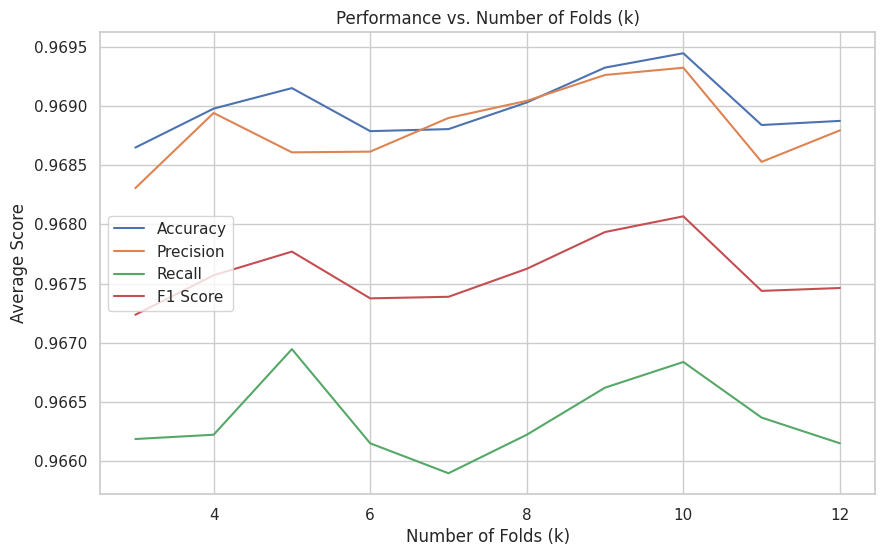

In [ ]:
# Define the range of values for k
k_values = np.arange(3, 13, 1)

# Initialize lists to store average scores for each k
avg_accuracy_scores, avg_precision_scores, avg_recall_scores, avg_f1_scores = [], [], [], []

# Iterate over different values of k
for k in k_values:
    # Initialize Stratified K-Fold Cross-Validation
    skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

    # Initialize lists to store the scores for the current k
    accuracy_scores, precision_scores, recall_scores, f1_scores = [], [], [], []

    # Iterate over the folds
    for train_index, val_index in skf.split(x, y):
        # Split the data into training and validation sets
        x_train, x_val = x.iloc[train_index], x.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        # Initialize and train the model
        model = RandomForestClassifier(random_state=42)
        model.fit(x_train, y_train)

        # Perform predictions on the validation set
        y_pred = model.predict(x_val)

        # Calculate the evaluation metrics
        accuracy_scores.append(accuracy_score(y_val, y_pred))
        precision_scores.append(precision_score(y_val, y_pred))
        recall_scores.append(recall_score(y_val, y_pred))
        f1_scores.append(f1_score(y_val, y_pred))

    # Calculate average scores for the current k
    avg_accuracy = sum(accuracy_scores) / k
    avg_precision = sum(precision_scores) / k
    avg_recall = sum(recall_scores) / k
    avg_f1 = sum(f1_scores) / k

    # Append average scores to the lists
    avg_accuracy_scores.append(avg_accuracy)
    avg_precision_scores.append(avg_precision)
    avg_recall_scores.append(avg_recall)
    avg_f1_scores.append(avg_f1)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, avg_accuracy_scores, label='Accuracy')
plt.plot(k_values, avg_precision_scores, label='Precision')
plt.plot(k_values, avg_recall_scores, label='Recall')
plt.plot(k_values, avg_f1_scores, label='F1 Score')
plt.xlabel('Number of Folds (k)')
plt.ylabel('Average Score')
plt.title('Performance vs. Number of Folds (k)')
plt.legend()
plt.grid(True)
plt.show()


From the above graph it is clear that the best value of k with respect to Recall is 5.Hence k=5 will be used in Stratefied Cross Validation for Random Forest.

#### **Comparison between Random Forest Model and Random Forest Model with Stratefied Cross Validation**

**Random forest model**

Recall- 0.9679(96.79%)

**Random Forest with Stratefied K Fold Cross Validation**

Recall- 0.9669(96.69%)



Hence Random Forest Model will be used to make prediction on unseen data because its Recall(0.9679) is slightly higher than Recall(0.9669) of Random Forest Model with Stratefied K Fold Cross Validation.

### Hence,**Logistic Regression Model** will be used for prediction of data in future because as compared to the other models prepared above it is seen that **Recall(0.97)** is higher in this model.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

In conclusion,project on airline passenger referral prediction has provided valuable insights and strategies to enhance customer retention and foster positive referral behavior.Emphasize on the importance of proactive communication, seeking customer feedback, and introducing targeted offers to incentivize referrals. Additionally, focusing on customer satisfaction, addressing issues faced by customers, and maintaining a competitive edge are crucial components of a successful referral strategy.By staying attuned to customer needs and preferences, airlines can build lasting relationships and ensure a positive and rewarding travel experience for their passengers.

***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***

#####*Additional Machine Learning Models including techniques like Feature Importance and Feature Extraction*

###### Using Feature Importance Technique(Recursive Feature Elimination)

In [ ]:
from sklearn.feature_selection import RFE
# Use Logistic Regression
model = LogisticRegression()

# Use RFE to select features
rfe = RFE(model, n_features_to_select=4)  # Adjusting the number of features to select
fit = rfe.fit(x_train, y_train)

# Get selected features
selected_features = x.columns[fit.support_]
unselected_features = x.columns[~fit.support_]

# Train logistic regression model on selected features
model.fit(x_train[selected_features], y_train)

# Make predictions on the test set
y_pred = model.predict(x_test[selected_features])

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Display evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Display selected features and their coefficients
print("\nSelected Features and Coefficients:")
for feature, coefficient in zip(selected_features, model.coef_[0]):
    print(f"{feature}: {coefficient}")

# Display unselected features and their coefficients
print("\nUnselected Features and Coefficients:")
for feature, coefficient in zip(unselected_features, model.coef_[0]):
    print(f"{feature}: {coefficient}")

Accuracy: 0.9729238754325259
Precision: 0.9748358862144421
Recall: 0.9683028436877378
F1 Score: 0.9715583825533848

Selected Features and Coefficients:
overall: 2.3895223539634687
value_for_money: 0.9063804986601327
airline_Adria Airways: 1.2236003138713007
airline_Sunwing Airlines: -1.3130432510664969

Unselected Features and Coefficients:
seat_comfort: 2.3895223539634687
cabin_service: 0.9063804986601327
cabin_Business Class: 1.2236003138713007
cabin_Economy Class: -1.3130432510664969


Recall of Logistic Regression Model is slightly high as compared to this Logistic Regression Model with Recursive Feature Elimination technique.Hence Logistic Regression model with Recursive Feature Elimination technique will not be selected as a final model for predicting the unseen data.

Hence Logistic Regression Model will be preferred over Logistic Regression Model with Recursive Feature Elimination.

###### Using Feature Extraction Technique(Principle Component Analysis)

In [ ]:
from sklearn.decomposition import PCA

# Use PCA for dimensionality reduction
pca = PCA(n_components=4)  # You can adjust the number of components
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

# Use Logistic Regression on the reduced feature space
model = LogisticRegression()
model.fit(x_train_pca, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test_pca)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Display evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Display explained variance ratios for each principal component
print("\nExplained Variance Ratios:")
print(pca.explained_variance_ratio_)

Accuracy: 0.9735294117647059
Precision: 0.97538742023701
Recall: 0.9690273501177323
F1 Score: 0.9721969834635653

Explained Variance Ratios:
[0.83437563 0.04397701 0.032032   0.02316434]


Recall of Logistic Regression Model is slightly high as compared to this Logistic Regression Model with Principle Component Analysis technique.Hence Logistic Regression model with Principle Component Analysis technique will not be selected as a final model for predicting the unseen data.

Hence Logistic Regression Model will be preferred over Logistic Regression Model with Principal Component Analysis technique.